In [1]:
import numpy as np

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
AVAILABLE_DATASETS = ['wine', 'breast_cancer', 'iris']
print("Available Datasets : ")
for i in range(len(AVAILABLE_DATASETS)) :
    ds_name = AVAILABLE_DATASETS[i].replace('_',' ')
    print(str(i+1) + ".", ds_name)
print("Enter dataset number to load: ")
ds_index = int(input().strip())
dataset_name = AVAILABLE_DATASETS[ds_index-1].replace('_',' ')
print(dataset_name, "dataset loaded")


Available Datasets : 
1. wine
2. breast cancer
3. iris
Enter dataset number to load: 
2
breast cancer dataset loaded


In [4]:
"""
Load the Dataset

"""

#dataset_name = "iris"

if ds_index == 1 :
    dataset = datasets.load_wine()
elif ds_index == 2 :
    dataset = datasets.load_breast_cancer()
elif ds_index == 3 :
    dataset = datasets.load_iris()

X = dataset.data
Y = dataset.target

feature_names = dataset.feature_names


class_names = dataset.target_names

class_dict = {i : class_names[i] for i in range(len(class_names))}

print(dataset.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [5]:

"""
Split Dataset into Training and Testing sets
"""
X_train, X_test, Y_train, Y_test = train_test_split(X, Y) #, random_state =

print("Class Dictionary", class_dict)

Class Dictionary {0: 'malignant', 1: 'benign'}


In [6]:
import pandas as pd
df = pd.DataFrame(X)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:

"""
Entropy function takes as input, list of labels Y and a list of all possible classes 
It returns the entropy of the current data subset.

Entropy = Sum Pi * log2(Pi)
           i
"""

def entropy(Y, possible_classes):
    entropy = 0
    total_count = len(Y)
    for y in possible_classes :
        count_y = (Y == y).sum()
        p_i = count_y/total_count
        entropy -=  p_i * np.log(p_i)/np.log(2)
    return entropy

"""
info_gain_for_split return inforamation gain of the current split of Y with list of integers splits
ith value of list splits means the ith Y value belongs to that split

lengths of Y and splits are equal

e.g. say Y = 1.2 4.5 3.2 2.3
    splits = 0 1 0 1 
    then 1.2 and 3.2 belong to same group, 4.5 and  2.3 belong to same group
"""

def info_gain_split_info_for_split(Y, splits):
    
    #initialize info_gain and split_info values
    info_gain = 0
    split_info = 0    
    
    # mod_Y is number of examples
    mod_Y = len(Y)
    
    # unique splits are number of groups in which data is divided
    unique_splits = list(set(splits))
    
    
    for s in unique_splits:
        
        # find indices of examples in group s
        indices = (splits == s)
        Y_split_i = Y[indices]
                
        #number of examples in current group s
        mod_Y_i = len(Y_split_i)
        
        """
                                           |Yi|
         ratio_mod_Y_i_to_mod_Y, ratio =   ----
                                           |Y|
        """
        ratio_mod_Y_i_to_mod_Y = (mod_Y_i/mod_Y)
        
        # list of all possible classes in group s
        possible_classes_Y_i = list(set(Y_split_i))
        
        # update info gain and split info values
        info_gain += ((ratio_mod_Y_i_to_mod_Y) * entropy( Y_split_i, possible_classes_Y_i))
        split_info -= (ratio_mod_Y_i_to_mod_Y * np.log(ratio_mod_Y_i_to_mod_Y)/np.log(2))
    
    return info_gain, split_info

"""
Considering input data to be continious, split method takes as input X - the data, Y - the labels, 
and feature index on which to split the data

1. find the set of unique values of feature f and sort it
2. build list of mid values ie mean of each pair of adjacent values
3. for each mid value
    3.1 split data into two parts
    3.2 find information gain
    3.3 keep the best split
returns min_info_gain: information gain for best split 
        min_split_info : split info for best split
        best_split_labels : list of labels for each example
        mid_value_for_min_info_gain : the mid value for which best split on feature f was made
"""


def split(X, Y, feature):
    # find the set of unique values of feature f and sort it
    possible_values_current_feature = list(set( X[:, feature] ))
    pvcf = possible_values_current_feature
    pvcf.sort()
    
    
    # build list of mid values ie mean of each pair of adjacent values
    mid_values = []
    for i in range(len(possible_values_current_feature) -1 ):
        mid_values.append((pvcf[i] + pvcf[i+1])/2)
    
    # initialize variables
    min_info_gain = np.inf
    mid_value_for_min_info_gain = 0
    min_split_info = 0
    best_split_labels = np.array([])
    
    # iterate over list of mid values
    for value in mid_values:
        current_split_labels = np.ones(len(Y))
        
        # splitting data into two parts, one group belongs to split 0 and other to split 1
        current_split_labels[ X[:, feature] <= value ] = 0
        
        # find information gain and split info for current split
        current_split_information_gain, current_split_split_info = info_gain_split_info_for_split(Y, current_split_labels)
        
        # keep the best split
        if current_split_information_gain < min_info_gain :
            min_info_gain = current_split_information_gain
            mid_value_for_min_info_gain = value
            min_split_info = current_split_split_info
            best_split_labels = current_split_labels
    
    return min_info_gain, min_split_info, best_split_labels.astype(int), mid_value_for_min_info_gain

"""
decision_tree:
    Input:
        X : list of examples
        Y : list of labels
        features : list of indices of features; after each split, one element is removed from this list
        feature_names: list of feature names
        class_dict : dictionary of possible classes indices mapped to class names
        level : level in recursion tree (only used for printing steps)
    
    Output:
        dictionary of nodes where each node is a decision node used for prediction
"""
    
def decision_tree(X, Y, features, feature_names, class_dict, level = 0):
    # current decision node dictionary
    node = {}
    
    #
    node["level"] = level
    
    # dictionary of classes mapped to respective counts in Y
    class_counts = {}
    print("\nLevel", level)
    possible_classes = list(set(Y))
    
    # max_class is majority class, max_count is count of majority class
    max_count = -np.inf
    max_class = possible_classes[0]
    
    # add key value pairs of classes and their counts in class_counts dictionary
    # also find the majority class 
    for y in possible_classes:
        count_y = (Y == y).sum()
        class_counts[class_dict[y]] = count_y
        print("Count of", class_dict[y], "=", count_y)
        if count_y > max_count :
            max_count = count_y
            max_class = y   
    
    # find current entropy
    current_entropy = entropy(Y, possible_classes)
    print("Current Entropy is =", current_entropy)
    
    # add the class_counts dictionary to node dictionary
    node['class_counts'] = class_counts
    
    # add entropy value to node dictionary
    node["Entropy"] = current_entropy
    
    """
    check for base case, ie either all the examples are marked with a single class
    or
    there is no more feature to split current data
    
    mark this decision node as leaf node
    add the value of predict class to this node
    
    return the node
    """
    
    node["predict_class"] = max_class
    node["num_of_examples"] = len(Y)

    if len(possible_classes) == 1 or len(features) == 0:
        print("Reached leaf Node")
        node["is_leaf"] = True
        return node
    
    """
    else
    this node is NOT a leaf node and splitting can be done
    
    """
    node["is_leaf"] = False
    
    """ initialize few variables
    
    selected_feature : index of selected feature to make split on
    
    max_info_gain : information gain on splitting using the selected_feature
    
    max_split_info : split info on splitting using the selected_feature
    
    best_split_labels : labels assigned to examples
    
    best_split_mid_value : mid value of selected feature to use for prediction
    
    """
    selected_feature = None
    max_info_gain = -np.inf
    max_split_info = 1
    best_split_labels = None
    best_split_mid_value = None
    
    # iterate over all available features
    for f in features:
        
        # find info gain
        # split info
        # current split labels for best split on curent feature 
        # mid value for current feature
        info_gain, split_info, current_split, current_mid_value_for_f = split(X, Y, f)
        #print("info_gain, split_info", info_gain, split_info)
        #print("gain ratio", info_gain/split_info)

        # keep feature that gives maximum gain
        if info_gain < np.inf and split_info != 0 :
            if info_gain/split_info > max_info_gain/max_split_info:
                selected_feature = f
                max_info_gain = info_gain
                max_split_info = split_info
                best_split_labels = current_split
                best_split_mid_value = current_mid_value_for_f

    """
    add index, name of selected feature 
    information gain
    mid value of selected feature
    number of examples at current decision
    to node dictionary
    """
    node["selected_feature"] = feature_names[selected_feature]
    node["selected_feature_index"] = selected_feature
    node["max_info_gain"] = max_info_gain
    node["best_split_mid_value"] = best_split_mid_value
    
    if max_split_info != 0 :
        print("Splitting on feature", "\'" + feature_names[selected_feature] + "\'","with gain ratio", max_info_gain/max_split_info)
    else :
        print("Splitting on feature", "\'" + feature_names[selected_feature] + "\'","with gain ratio inf")
    #splits = split(X, Y, selected_feature)
    
    # find list of groups in which current dataset is divided
    unique_splits = list(set(best_split_labels))
    
    # remove index of selected feature
    selected_feature_index = np.argwhere(features == selected_feature)
    features =  np.delete(features, selected_feature_index)
    
    """
    recursively call decision tree on 'split' datasets
    """
    for s in unique_splits:
        # find indices of examples that belong to split s
        indices = (best_split_labels == s)
        X_split_i = X[indices, :]
        Y_split_i = Y[indices]
        # store the output dictionaries of child splits in current node dictionary
        node[s] = decision_tree(X_split_i, Y_split_i, features, feature_names, class_dict, level + 1)
    """
    return the "decision tree" (dictionary)
    """
    return node


features = np.arange(len(feature_names))


"""

call to decision_tree function 

resulting decision tree is stored in tree_dict

"""
tree_dict = decision_tree(X_train, Y_train, features, feature_names, class_dict)


Level 0
Count of malignant = 147
Count of benign = 279
Current Entropy is = 0.929588304049
Splitting on feature 'symmetry error' with gain ratio 6.69189060942

Level 1
Count of malignant = 139
Count of benign = 279
Current Entropy is = 0.917496320816
Splitting on feature 'smoothness error' with gain ratio 3.48098278844

Level 2
Count of malignant = 139
Count of benign = 261
Current Entropy is = 0.931815504241
Splitting on feature 'worst symmetry' with gain ratio 2.04769243582

Level 3
Count of malignant = 109
Count of benign = 258
Current Entropy is = 0.87759613486
Splitting on feature 'mean fractal dimension' with gain ratio 1.31139127194

Level 4
Count of malignant = 32
Count of benign = 28
Current Entropy is = 0.996791631982
Splitting on feature 'texture error' with gain ratio 1.79698582103

Level 5
Count of malignant = 1
Count of benign = 6
Current Entropy is = 0.591672778582
Splitting on feature 'mean symmetry' with gain ratio 0.470538226361

Level 6
Count of benign = 3
Current E

Count of malignant = 1
Count of benign = 22
Current Entropy is = 0.258018668665
Splitting on feature 'mean texture' with gain ratio 0.214413568598

Level 11
Count of benign = 20
Current Entropy is = 0.0
Reached leaf Node

Level 11
Count of malignant = 1
Count of benign = 2
Current Entropy is = 0.918295834054
Splitting on feature 'mean perimeter' with gain ratio 0.725982457879

Level 12
Count of benign = 1
Current Entropy is = 0.0
Reached leaf Node

Level 12
Count of malignant = 1
Count of benign = 1
Current Entropy is = 1.0
Splitting on feature 'mean area' with gain ratio 0.0

Level 13
Count of malignant = 1
Current Entropy is = 0.0
Reached leaf Node

Level 13
Count of benign = 1
Current Entropy is = 0.0
Reached leaf Node

Level 10
Count of malignant = 2
Count of benign = 1
Current Entropy is = 0.918295834054
Splitting on feature 'mean concave points' with gain ratio 0.725982457879

Level 11
Count of malignant = 1
Current Entropy is = 0.0
Reached leaf Node

Level 11
Count of malignant 

In [8]:
"""
returns predicted class for a single test datapoint, decision tree is stored in tree_dict
"""
def predict_single(X, tree_dict):
    
    # base case => if leaf node is reahched, return the predicted class
    
    if tree_dict['is_leaf']:
        return tree_dict["predict_class"]
    
    # find the feature index,  and decision value of that feature for decision to be made
    index = tree_dict["selected_feature_index"]
    feature_value = tree_dict["best_split_mid_value"]
    
    # if feature value of test datapoint is less than decision value, go left, 
    if X[index] <= feature_value :
        return predict_single(X, tree_dict[0])
    #else go right :)
    else:
        return predict_single(X, tree_dict[1])

"""
Main Predict function to get predicted classes for a test dataset
returns list of predicted classes  
"""
def predict(X, tree_dict):
    Y_pred = []
    for i in range(len(X)):
        Y_pred.append(predict_single(X[i], tree_dict))
    return Y_pred

"""
helper function to print non-dictionary key-value pairs of each decision node of the decision tree
"""
def print_dict(dictionary):
    for key in dictionary:
        if isinstance(dictionary[key], dict) :
            print(key, end = " ")
            print_dict(dictionary[key])
        else:
            print(key, dictionary[key])


    

In [9]:
print_dict(tree_dict)

level 0
class_counts malignant 147
benign 279
Entropy 0.929588304049
predict_class 1
num_of_examples 426
is_leaf False
selected_feature symmetry error
selected_feature_index 18
max_info_gain 0.90026634296
best_split_mid_value 0.04371
0 level 1
class_counts malignant 139
benign 279
Entropy 0.917496320816
predict_class 1
num_of_examples 418
is_leaf False
selected_feature smoothness error
selected_feature_index 14
max_info_gain 0.891689477743
best_split_mid_value 0.012395
0 level 2
class_counts malignant 139
benign 261
Entropy 0.931815504241
predict_class 1
num_of_examples 400
is_leaf False
selected_feature worst symmetry
selected_feature_index 28
max_info_gain 0.841452955155
best_split_mid_value 0.36085
0 level 3
class_counts malignant 109
benign 258
Entropy 0.87759613486
predict_class 1
num_of_examples 367
is_leaf False
selected_feature mean fractal dimension
selected_feature_index 9
max_info_gain 0.8426848504
best_split_mid_value 0.056255
0 level 4
class_counts malignant 32
benign 28
E

1 level 12
class_counts malignant 1
benign 1
Entropy 1.0
predict_class 0
num_of_examples 2
is_leaf False
selected_feature mean area
selected_feature_index 3
max_info_gain 0.0
best_split_mid_value 569.3
0 level 13
class_counts malignant 1
Entropy 0.0
predict_class 0
num_of_examples 1
is_leaf True
1 level 13
class_counts benign 1
Entropy 0.0
predict_class 1
num_of_examples 1
is_leaf True
1 level 10
class_counts malignant 2
benign 1
Entropy 0.918295834054
predict_class 0
num_of_examples 3
is_leaf False
selected_feature mean concave points
selected_feature_index 7
max_info_gain 0.666666666667
best_split_mid_value 0.044315
0 level 11
class_counts malignant 1
Entropy 0.0
predict_class 0
num_of_examples 1
is_leaf True
1 level 11
class_counts malignant 1
benign 1
Entropy 1.0
predict_class 0
num_of_examples 2
is_leaf False
selected_feature mean texture
selected_feature_index 1
max_info_gain 0.0
best_split_mid_value 18.81
0 level 12
class_counts benign 1
Entropy 0.0
predict_class 1
num_of_exampl

class_counts malignant 1
benign 1
Entropy 1.0
predict_class 0
num_of_examples 2
is_leaf False
selected_feature mean radius
selected_feature_index 0
max_info_gain 0.0
best_split_mid_value 13.434
0 level 15
class_counts benign 1
Entropy 0.0
predict_class 1
num_of_examples 1
is_leaf True
1 level 15
class_counts malignant 1
Entropy 0.0
predict_class 0
num_of_examples 1
is_leaf True
1 level 6
class_counts malignant 10
benign 52
Entropy 0.637387499222
predict_class 1
num_of_examples 62
is_leaf False
selected_feature worst smoothness
selected_feature_index 24
max_info_gain 0.502618528031
best_split_mid_value 0.14575
0 level 7
class_counts malignant 4
benign 47
Entropy 0.396627772778
predict_class 1
num_of_examples 51
is_leaf False
selected_feature concave points error
selected_feature_index 17
max_info_gain 0.321024430544
best_split_mid_value 0.03147
0 level 8
class_counts malignant 3
benign 47
Entropy 0.327444919154
predict_class 1
num_of_examples 50
is_leaf False
selected_feature fractal di

In [10]:
"""
Making Predictions
"""
for i in range(len(X)):
    print("Example", i)
    pred = predict_single(X[i], tree_dict)

    print("\tActual Class:", class_dict[Y[i]])
    print("\tPredicted Class:", class_dict[pred])


Example 0
	Actual Class: malignant
	Predicted Class: malignant
Example 1
	Actual Class: malignant
	Predicted Class: malignant
Example 2
	Actual Class: malignant
	Predicted Class: malignant
Example 3
	Actual Class: malignant
	Predicted Class: malignant
Example 4
	Actual Class: malignant
	Predicted Class: malignant
Example 5
	Actual Class: malignant
	Predicted Class: malignant
Example 6
	Actual Class: malignant
	Predicted Class: malignant
Example 7
	Actual Class: malignant
	Predicted Class: malignant
Example 8
	Actual Class: malignant
	Predicted Class: malignant
Example 9
	Actual Class: malignant
	Predicted Class: malignant
Example 10
	Actual Class: malignant
	Predicted Class: malignant
Example 11
	Actual Class: malignant
	Predicted Class: malignant
Example 12
	Actual Class: malignant
	Predicted Class: malignant
Example 13
	Actual Class: malignant
	Predicted Class: malignant
Example 14
	Actual Class: malignant
	Predicted Class: malignant
Example 15
	Actual Class: malignant
	Predicted Cla

Example 327
	Actual Class: benign
	Predicted Class: benign
Example 328
	Actual Class: malignant
	Predicted Class: malignant
Example 329
	Actual Class: malignant
	Predicted Class: malignant
Example 330
	Actual Class: malignant
	Predicted Class: malignant
Example 331
	Actual Class: benign
	Predicted Class: benign
Example 332
	Actual Class: benign
	Predicted Class: benign
Example 333
	Actual Class: benign
	Predicted Class: benign
Example 334
	Actual Class: benign
	Predicted Class: benign
Example 335
	Actual Class: malignant
	Predicted Class: malignant
Example 336
	Actual Class: benign
	Predicted Class: benign
Example 337
	Actual Class: malignant
	Predicted Class: malignant
Example 338
	Actual Class: benign
	Predicted Class: benign
Example 339
	Actual Class: malignant
	Predicted Class: malignant
Example 340
	Actual Class: benign
	Predicted Class: benign
Example 341
	Actual Class: benign
	Predicted Class: benign
Example 342
	Actual Class: benign
	Predicted Class: benign
Example 343
	Actual 

	Predicted Class: malignant
Example 568
	Actual Class: benign
	Predicted Class: benign


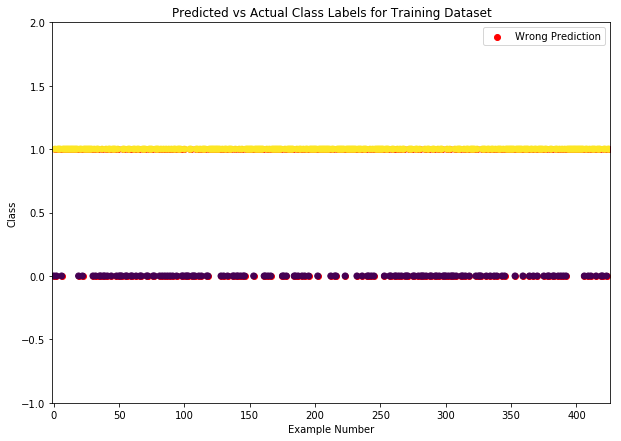

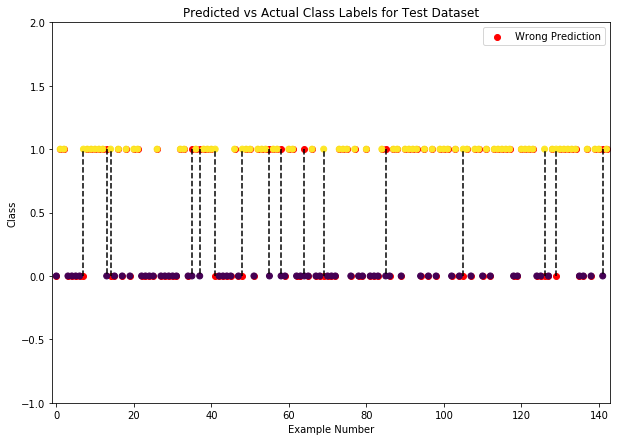

In [11]:
import matplotlib.pyplot as plt

"""
returns list of lines to mark the line passing through 
actual and predicted values for each set of points 
where the predicted and actual classes differ 
"""

def get_lines(indices, Y_pred, Y):
    lines = []
    for i in indices :
        if Y_pred[i] != Y[i] :
            line = [[i, i], [Y_pred[i], Y[i]]]
            lines.append(line)
    return lines


indices = np.arange(len(Y_train))
Y_train_pred = predict(X_train, tree_dict)
plt.figure(figsize = (10, 7))
plt.title("Predicted vs Actual Class Labels for Training Dataset")
plt.axis((-1,len(X_train), -1, len(class_dict)))
plt.scatter(indices, Y_train_pred, c = 'r', label = "Wrong Prediction")
plt.scatter(indices, Y_train, c = Y_train)
plt.xlabel("Example Number")
plt.ylabel("Class")
lines = get_lines(indices, Y_train_pred, Y_train)

for line in lines:
    line_X = line[0]
    line_Y = line[1]
    plt.plot(line_X, line_Y, c = 'black', linestyle = "dashed")
    
plt.legend()
plt.show()

indices = np.arange(len(Y_test))

Y_test_pred = predict(X_test, tree_dict)
plt.figure(figsize = (10, 7))
plt.title("Predicted vs Actual Class Labels for Test Dataset")
plt.axis((-1,len(X_test), -1, len(class_dict)))
plt.scatter(indices, Y_test_pred, c = 'r', label = "Wrong Prediction")
plt.scatter(indices, Y_test, c = Y_test)
plt.xlabel("Example Number")
plt.ylabel("Class")
lines = get_lines(indices, Y_test_pred, Y_test)

for line in lines:
    line_X = line[0]
    line_Y = line[1]
    plt.plot(line_X, line_Y, c = 'black', linestyle = "dashed")
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix for Y_train\n", confusion_matrix(Y_train, Y_train_pred))
print("Confusion Matrix for Y_test\n", confusion_matrix(Y_test, Y_test_pred))

Confusion Matrix for Y_train
 [[147   0]
 [  0 279]]
Confusion Matrix for Y_test
 [[57  8]
 [ 8 70]]


In [13]:
from sklearn.metrics import classification_report
print("Confusion Report for Y_train\n", classification_report(Y_train, Y_train_pred))
print("Confusion Report for Y_test\n", classification_report(Y_test, Y_test_pred))

Confusion Report for Y_train
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       147
          1       1.00      1.00      1.00       279

avg / total       1.00      1.00      1.00       426

Confusion Report for Y_test
              precision    recall  f1-score   support

          0       0.88      0.88      0.88        65
          1       0.90      0.90      0.90        78

avg / total       0.89      0.89      0.89       143



In [14]:
# Level order traversal

def print_node(node):
    for key, val in node.items() :
        if not isinstance(val, dict) :
            print(key, ":", val)
    
def print_tree_level_order(tree_dict):
    from collections import deque
    q = deque([tree_dict])
    while len(q)!= 0 :
        node = q.popleft()
        print("*" * 100)
        print("Len", len(q))
        print("*" * 100)
        if 0 in node.keys() :
            q.append(node[0])
            
        if 1 in node.keys() :
            q.append(node[1])
        print_node(node)

print_tree_level_order(tree_dict)




****************************************************************************************************
Len 0
****************************************************************************************************
level : 0
Entropy : 0.929588304049
predict_class : 1
num_of_examples : 426
is_leaf : False
selected_feature : symmetry error
selected_feature_index : 18
max_info_gain : 0.90026634296
best_split_mid_value : 0.04371
****************************************************************************************************
Len 1
****************************************************************************************************
level : 1
Entropy : 0.917496320816
predict_class : 1
num_of_examples : 418
is_leaf : False
selected_feature : smoothness error
selected_feature_index : 14
max_info_gain : 0.891689477743
best_split_mid_value : 0.012395
****************************************************************************************************
Len 2
*********************************************

best_split_mid_value : 15.8
****************************************************************************************************
Len 12
****************************************************************************************************
level : 7
Entropy : 0.660962335144
predict_class : 0
num_of_examples : 35
is_leaf : False
selected_feature : mean smoothness
selected_feature_index : 4
max_info_gain : 0.498982080002
best_split_mid_value : 0.080055
****************************************************************************************************
Len 13
****************************************************************************************************
level : 7
Entropy : 0.353359335021
predict_class : 1
num_of_examples : 60
is_leaf : False
selected_feature : worst texture
selected_feature_index : 21
max_info_gain : 0.27413250864
best_split_mid_value : 33.815
****************************************************************************************************
Len 14
********************

num_of_examples : 9
is_leaf : False
selected_feature : worst fractal dimension
selected_feature_index : 29
max_info_gain : 0.612197222703
best_split_mid_value : 0.093245
****************************************************************************************************
Len 21
****************************************************************************************************
level : 10
Entropy : 0.0
predict_class : 0
num_of_examples : 1
is_leaf : True
****************************************************************************************************
Len 20
****************************************************************************************************
level : 10
Entropy : 0.0
predict_class : 1
num_of_examples : 1
is_leaf : True
****************************************************************************************************
Len 19
****************************************************************************************************
level : 10
Entropy : 0.0
predict_class : 1
num_

selected_feature : mean perimeter
selected_feature_index : 2
max_info_gain : 0.0
best_split_mid_value : 78.51
****************************************************************************************************
Len 15
****************************************************************************************************
level : 12
Entropy : 0.0
predict_class : 1
num_of_examples : 4
is_leaf : True
****************************************************************************************************
Len 14
****************************************************************************************************
level : 12
Entropy : 0.0
predict_class : 0
num_of_examples : 1
is_leaf : True
****************************************************************************************************
Len 13
****************************************************************************************************
level : 13
Entropy : 0.0
predict_class : 1
num_of_examples : 1
is_leaf : True
*****************************

### PyDotPlus Documentation Reference
http://pydotplus.readthedocs.io/reference.html

In [15]:
import pydotplus as dot

"""
returns the label for the current node
"""
def get_node_data(node, class_dict):
    data = ""
    if not node['is_leaf'] :
        data += node['selected_feature'] + " <= " + str(node['best_split_mid_value']) + "\n"
        data += "Gain = " + str(node['max_info_gain']) + "\n"
    data += "entropy = " + str(node['Entropy']) + "\n"
    data += "samples = " + str(node['num_of_examples']) + "\n"
    value = [0 for i in range(len(class_dict))]
    for index, name in class_dict.items():
        if name in node["class_counts"] :
            value[index] = (node["class_counts"][name])
    data += "value = " + str(value) + "\n"
    data += "class = " + class_dict[node['predict_class']]
        
    return data


"""
returns the graph for the decision tree
"""
def get_decision_tree_graph(tree_dict, class_dict):
    graph = dot.Dot(graph_type = "digraph")
    
    from collections import deque
    q = deque([tree_dict])
    
    while len(q)!= 0 :
        
        node = q.popleft()
        
        parent_node = get_node_data(node, class_dict)
        
        if 0 in node.keys() :
            q.append(node[0])
            child_0_node = get_node_data(node[0], class_dict)
            edge = dot.Edge(parent_node, child_0_node, label = True)
            graph.add_edge(edge)
            
        if 1 in node.keys() :
            q.append(node[1])
            child_1_node = get_node_data(node[1], class_dict)
            edge = dot.Edge(parent_node, child_1_node, label = False)
            graph.add_edge(edge)
    return graph

graph = get_decision_tree_graph(tree_dict, class_dict)
graph.write_png(dataset_name + "_dataset_decision_tree.png")

True